In [1]:
from sklearn.cluster import kmeans_plusplus
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
prices = pd.read_excel("average_prices.xlsx")
prices.head(10)

,Код территории,Наименование территории,"Говядина (кроме бескостного мяса), кг","Говядина бескостная, кг","Свинина (кроме бескостного мяса), кг","Свинина бескостная, кг","Баранина (кроме бескостного мяса), кг","Куры охлажденные и мороженые, кг","Окорочка куриные, кг","Мясо индейки, кг",...,"Аренда индивидуального банковского сейфа, в расчете на месяц","Комиссия банка за перевод средств с карты на карту клиенту другого банка на территории России, услуга","Годовая стоимость полиса добровольного страхования жилья от стандартных рисков, полис","Годовая стоимость полиса добровольного страхования легкового автомобиля от стандартных рисков (КАСКО), полис","Годовая стоимость полиса обязательного страхования гражданской ответственности владельцев транспортных средств (ОСАГО), полис","Занятия в плавательных бассейнах, месяц","Клубная карта в фитнес-клуб, месяц","Повторное получение гербового документа в органах ЗАГС, документ","Ксерокопирование документа, лист","Пользование общественным туалетом, посещение"
0,643,Российская Федерация,499.68,676.64,331.44,431.04,603.52,208.80,237.83,457.93,...,1262.71,144.27,7080.95,76055.74,13434.53,2386.34,2454.2,350,10.85,19.79
1,30,Центральный федеральный округ,570.93,732.25,325.6,423.69,732.72,203.15,238.81,506.82,...,1661.85,143.25,7357.57,77197.71,14732.33,2690.52,2612.8,350,15.65,28.09
2,14000000000,Белгородская область,423.5,566.88,265.83,356.68,528.99,188.09,199.38,357.96,...,1335.14,153.86,5921.62,36854.14,9493.28,1379,1598.22,350,10,15
3,14401000000,Белгород,408.69,559.87,257.05,359.76,528.99,186.92,195.34,345.58,...,1335.14,152.78,5921.62,36854.14,9213.86,1379,1611.74,350,10,15
4,14430000000,Губкин,417.86,562.9,236.34,379.35,...,180.41,206.47,342.49,...,...,145.65,...,...,9078.96,...,767.74,...,...,...
5,14440000000,Старый Оскол,455.86,582.91,299.46,338.06,...,194.63,203.44,390.95,...,...,160.53,...,...,10274,...,2030.27,...,...,...
6,15000000000,Брянская область,552.93,666.33,324.02,410.39,681.74,212.19,222.76,393.39,...,1800,150,7474.58,79746.68,7982.75,1867.58,3048.8,350,11.49,10
7,15401000000,Брянск,538.97,639.69,305.94,391.47,681.74,223.21,227.50,372.23,...,1800,150,7474.58,79746.68,7982.75,1867.58,3048.8,350,11.49,10
8,15238551000,Навля,...,936.47,305.75,450.64,...,191.58,201.24,484.01,...,...,...,...,...,...,...,...,...,...,...
9,15415000000,Клинцы,579.62,612.3,375.91,447.75,...,197.29,216.99,...,...,...,...,...,...,...,...,...,...,...,...


In [3]:
def data_preprocessing():
    ct = np.array(prices["Код территории"])
    mark_column = list()

    for i in range(len(ct)):
        s = str(ct[i])
        if len(s) < 3:
            mark_column.append(0)
        elif s[2] == "0":
            mark_column.append(1)
        else:
            mark_column.append(0)

    temp_prices = prices
    temp_prices["Marks"] = mark_column
    temp_prices = temp_prices.loc[temp_prices["Marks"] == 1]
    del temp_prices["Marks"]

    tn = np.array(temp_prices["Наименование территории"])
    mark_column = list()

    for i in range(len(tn)):
        if tn[i] == 'Архангельская область (кроме Ненецкого автономного округа)':
            mark_column.append(0)
        elif tn[i] == 'Армавир':
            mark_column.append(0)
        elif tn[i] == 'Город федерального значения Севастополь':
            mark_column.append(0)
        elif tn[i] == 'Буденновск':
            mark_column.append(0)
        elif tn[i] == 'Ставрополь':
            mark_column.append(0)
        elif tn[i] == 'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)':
            mark_column.append(0)
        elif tn[i] == 'Барнаул':
            mark_column.append(0)
        elif tn[i] == 'Бийск':
            mark_column.append(0)
        elif tn[i] == 'Красноярск':
            mark_column.append(0)
        elif tn[i] == 'Ачинск':
            mark_column.append(0)
        elif tn[i] == 'Владивосток':
            mark_column.append(0)
        elif tn[i] == 'Хабаровск':
            mark_column.append(0)
        elif tn[i] == 'Комсомольск-на-Амуре':
            mark_column.append(0)
        elif tn[i] == 'Краснодар':
            mark_column.append(0)
        else:
            mark_column.append(1)

    temp_prices["Marks"] = mark_column
    temp_prices = temp_prices.loc[temp_prices["Marks"] == 1]
    del temp_prices["Marks"]

    return temp_prices

In [4]:
temp_prices = data_preprocessing()
temp_prices

C:\Users\ivvag\AppData\Local\Temp\ipykernel_16536\2657108056.py:54: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  temp_prices["Marks"] = mark_column
C:\Users\ivvag\AppData\Local\Temp\ipykernel_16536\2657108056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_prices["Marks"] = mark_column


,Код территории,Наименование территории,"Говядина (кроме бескостного мяса), кг","Говядина бескостная, кг","Свинина (кроме бескостного мяса), кг","Свинина бескостная, кг","Баранина (кроме бескостного мяса), кг","Куры охлажденные и мороженые, кг","Окорочка куриные, кг","Мясо индейки, кг",...,"Аренда индивидуального банковского сейфа, в расчете на месяц","Комиссия банка за перевод средств с карты на карту клиенту другого банка на территории России, услуга","Годовая стоимость полиса добровольного страхования жилья от стандартных рисков, полис","Годовая стоимость полиса добровольного страхования легкового автомобиля от стандартных рисков (КАСКО), полис","Годовая стоимость полиса обязательного страхования гражданской ответственности владельцев транспортных средств (ОСАГО), полис","Занятия в плавательных бассейнах, месяц","Клубная карта в фитнес-клуб, месяц","Повторное получение гербового документа в органах ЗАГС, документ","Ксерокопирование документа, лист","Пользование общественным туалетом, посещение"
2,14000000000,Белгородская область,423.5,566.88,265.83,356.68,528.99,188.09,199.38,357.96,...,1335.14,153.86,5921.62,36854.14,9493.28,1379,1598.22,350,10,15
6,15000000000,Брянская область,552.93,666.33,324.02,410.39,681.74,212.19,222.76,393.39,...,1800,150,7474.58,79746.68,7982.75,1867.58,3048.8,350,11.49,10
11,17000000000,Владимирская область,540.68,706.8,329.17,415.14,642.7,205.35,248.53,536.8,...,1120.09,150,6151.97,57981.07,15209.23,2093.56,2379.88,350,8.37,11.89
16,20000000000,Воронежская область,469.45,672.26,316.47,429.82,560.59,207.39,222.03,443.46,...,1580.75,150,7052.57,88140.56,15274.39,2537.03,1843.4,350,8.47,11.91
20,24000000000,Ивановская область,472.84,688.75,312.21,385.39,720.6,209.60,240.48,375.23,...,1325.24,150,4905.65,56900.48,15717.41,4800,1625.31,350,8.93,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,10000000000,Амурская область,498.4,732.25,412.41,481.14,679.28,262.74,280.86,455.8,...,1196,150,7800.76,101766.6,12125.29,2017.42,2271.57,350,7.98,16.23
362,44000000000,Магаданская область,758.89,792.56,409.29,535.94,870.22,324.20,329.89,481.28,...,1467.1,122.47,16434.75,131694.6,7713.18,1760,4690.42,350,27.98,...
366,64000000000,Сахалинская область,661.03,767.35,422.77,507.37,908.57,283.88,301.01,503.59,...,1361.22,163.71,9565.81,84593.44,10001.88,2516.81,5647.79,350,12.77,14.14
371,99000000000,Еврейская автономная область,599.73,757.85,375.01,503.96,652,271.41,291.44,351.54,...,1120.09,131.04,5856.18,...,9221.5,2478.71,2972.09,350,8.33,20


In [5]:
columns_list = temp_prices.columns.tolist()
for el in columns_list:
    temp_prices[str(el)] = temp_prices[str(el)].replace('...', np.nan)
temp_prices.dropna(axis = 'columns',how = 'any', inplace = True)
temp_prices

,Код территории,Наименование территории,"Говядина (кроме бескостного мяса), кг","Говядина бескостная, кг","Куры охлажденные и мороженые, кг","Окорочка куриные, кг","Печень говяжья, свиная, кг","Фарш мясной, кг","Пельмени, манты, равиоли, кг","Сосиски, сардельки, кг",...,"Изготовление коронки, шт.","Лечебный массаж, сеанс","Клинический осмотр животного, посещение","Прививка животного, шт.","Удостоверение завещания в нотариальной конторе, услуга","Устная консультация юриста по семейным вопросам, консультация","Оформление доверенности в нотариальной конторе, услуга","Плата за пользование потребительским кредитом (процентная ставка в стоимостном выражении), руб.","Комиссия банка за перевод средств с карты на карту клиенту другого банка на территории России, услуга","Повторное получение гербового документа в органах ЗАГС, документ"
2,14000000000,Белгородская область,423.5,566.88,188.09,199.38,275.56,314.9,251.33,384.26,...,3486.13,215.93,224.4,980.93,2500,1000,2095.38,20314.05,153.86,350
6,15000000000,Брянская область,552.93,666.33,212.19,222.76,247,352.62,340.97,457.57,...,3253.72,319.68,361.52,1001.27,3100,700,2289.96,16352.18,150,350
11,17000000000,Владимирская область,540.68,706.8,205.35,248.53,289.58,429.95,344.81,442.34,...,3415.25,371.35,561.02,1219.43,3100,956.35,2500,18059.88,150,350
16,20000000000,Воронежская область,469.45,672.26,207.39,222.03,255.25,383.52,302.67,400.31,...,3594.56,432.84,428.42,1191.86,2600,866.03,2257.63,22520.2,150,350
20,24000000000,Ивановская область,472.84,688.75,209.60,240.48,302.88,379.66,317.67,412.34,...,5251.07,587.65,526.77,1085.03,2700,1259.92,1950,19814.95,150,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,10000000000,Амурская область,498.4,732.25,262.74,280.86,308.97,551.22,327.59,481.21,...,7915.01,623.18,332.46,930.22,3200,928.43,2493.44,19855.93,150,350
362,44000000000,Магаданская область,758.89,792.56,324.20,329.89,371.71,690.38,529.10,622.04,...,6822.46,1307.67,1129.24,2320.79,5000,1500,3500,18500,122.47,350
366,64000000000,Сахалинская область,661.03,767.35,283.88,301.01,331.56,519.03,468.94,676.51,...,15611.95,915,361.27,1166.69,3600,2282.82,3235.86,22762.36,163.71,350
371,99000000000,Еврейская автономная область,599.73,757.85,271.41,291.44,365.41,483.62,443.76,499.84,...,5132.72,492.21,315.82,848.35,2000,2000,1732.05,16378.34,131.04,350


In [6]:
columns_list = temp_prices.columns.tolist()
print(len(columns_list))
columns_list

412


['Код территории',
 'Наименование территории',
 'Говядина (кроме бескостного мяса), кг',
 'Говядина бескостная, кг',
 'Куры охлажденные и мороженые, кг',
 'Окорочка куриные, кг',
 'Печень говяжья, свиная, кг',
 'Фарш мясной, кг',
 'Пельмени, манты, равиоли, кг',
 'Сосиски, сардельки, кг',
 'Колбаса полукопченая и варено-копченая, кг',
 'Колбаса вареная, кг',
 'Мясокопчености, кг',
 'Кулинарные изделия из птицы, кг',
 'Консервы мясные, кг',
 'Консервы мясные для детского питания, кг',
 'Рыба соленая, маринованная, копченая, кг',
 'Икра лососевых рыб, отечественная, кг',
 'Креветки мороженые неразделаные, кг',
 'Рыба мороженая разделанная (кроме лососевых пород), кг',
 'Рыба охлажденная и мороженая разделанная лососевых пород, кг',
 'Рыба мороженая неразделанная, кг',
 'Филе рыбное, кг',
 'Сельдь соленая, кг',
 'Филе сельди соленое, кг',
 'Консервы рыбные натуральные и с добавлением масла, кг',
 'Консервы рыбные в томатном соусе, кг',
 'Масло сливочное, кг',
 'Масло подсолнечное, л',
 'М

In [7]:
products = list()
clothes = list()
medicines = list()
services = list()

i = 0
while columns_list[i] != 'Обед в столовой, кафе, закусочной (кроме столовой в организации), на 1 человека':
    products.append(columns_list[i])
    i += 1

while columns_list[i] != 'Куртка мужская с верхом из плащевых тканей утепленная, шт.':
    i += 1

while columns_list[i] != 'Мыло хозяйственное, 200 г':
    clothes.append(columns_list[i])
    i += 1

while columns_list[i] != 'Антисептик для рук, 100 мл':
    i += 1

while columns_list[i] != 'Свежесрезанные цветы, шт.':
    medicines.append(columns_list[i])
    i += 1

while columns_list[i] != 'Ремонт брюк из всех видов тканей, один вид работы':
    i += 1

while i < len(columns_list):
    services.append(columns_list[i])
    i += 1

In [8]:
prices_products = temp_prices[products]
prices_clothes = temp_prices[clothes]
prices_medicines = temp_prices[medicines]
prices_services = temp_prices[services]

In [9]:
prices_products.drop(columns = ['Код территории', 'Наименование территории'], inplace = True)
prices_products

C:\Users\ivvag\AppData\Local\Temp\ipykernel_16536\808139462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_products.drop(columns = ['Код территории', 'Наименование территории'], inplace = True)


,"Говядина (кроме бескостного мяса), кг","Говядина бескостная, кг","Куры охлажденные и мороженые, кг","Окорочка куриные, кг","Печень говяжья, свиная, кг","Фарш мясной, кг","Пельмени, манты, равиоли, кг","Сосиски, сардельки, кг","Колбаса полукопченая и варено-копченая, кг","Колбаса вареная, кг",...,"Апельсины, кг","Виноград, кг","Лимоны, кг","Бананы, кг","Сухофрукты, кг","Орехи, кг","Ягоды замороженные, кг","Вода минеральная и питьевая, л","Напитки газированные, л","Мороженое сливочное, кг"
2,423.5,566.88,188.09,199.38,275.56,314.9,251.33,384.26,522.80,380.68,...,124.88,203.75,150.05,103.98,307.76,1223.65,388.53,28.63,40.40,520.67
6,552.93,666.33,212.19,222.76,247,352.62,340.97,457.57,666.24,530.09,...,169.99,240.63,193.73,112.45,444.02,469.53,421.8,45.37,41.40,722.52
11,540.68,706.8,205.35,248.53,289.58,429.95,344.81,442.34,565.05,473.16,...,208.07,249.76,209.89,110.23,427.21,511.52,410.46,44.92,55.46,727.49
16,469.45,672.26,207.39,222.03,255.25,383.52,302.67,400.31,467.45,404.38,...,176.74,212.99,189.79,102.54,403.52,698.11,375.74,31.42,47.14,622.18
20,472.84,688.75,209.60,240.48,302.88,379.66,317.67,412.34,475.99,409.02,...,185.45,248.67,204.39,102.50,510.71,759.52,436.58,35.41,37.07,772.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,498.4,732.25,262.74,280.86,308.97,551.22,327.59,481.21,640.05,544.04,...,194.02,327.10,247.16,174.86,349,964.06,582.01,52.69,70.91,612.59
362,758.89,792.56,324.20,329.89,371.71,690.38,529.10,622.04,886.87,725.90,...,284.69,532.44,337.51,262.26,500.82,1367.47,552.85,100.88,108.19,950.7
366,661.03,767.35,283.88,301.01,331.56,519.03,468.94,676.51,874.57,736.87,...,277.35,478.84,310.66,239.89,373.36,1177.11,979.77,42.77,79.18,1110.75
371,599.73,757.85,271.41,291.44,365.41,483.62,443.76,499.84,697.91,526.63,...,210.91,285.69,232.23,167.18,356.95,1018.59,554.03,48.06,80.78,822.42


In [10]:
prices_products = np.array(prices_products)
prices_clothes = np.array(prices_clothes)
prices_medicines = np.array(prices_medicines)
prices_services = np.array(prices_services)
prices_products

array([[423.5, 566.88, 188.09, ..., 28.63, 40.4, 520.67],
       [552.93, 666.33, 212.19, ..., 45.37, 41.4, 722.52],
       [540.68, 706.8, 205.35, ..., 44.92, 55.46, 727.49],
       ...,
       [661.03, 767.35, 283.88, ..., 42.77, 79.18, 1110.75],
       [599.73, 757.85, 271.41, ..., 48.06, 80.78, 822.42],
       [753.12, 953.35, 372.9, ..., 230.63, 105.42, 1089.04]],
      dtype=object)

In [11]:
products_mean = list()
clothes_mean = list()
medicines_mean = list()
services_mean = list()

for i in range(len(prices_products)):
    products_mean.append(prices_products[i].mean())
    clothes_mean.append(prices_clothes[i].mean())
    medicines_mean.append(prices_medicines[i].mean())
    services_mean.append(prices_services[i].mean())

In [12]:
clust_df = pd.DataFrame()
clust_df['Наименование территории'] = temp_prices['Наименование территории']
clust_df['products'] = products_mean
clust_df['clothes'] = clothes_mean
clust_df['medicines'] = medicines_mean
clust_df['services'] = services_mean
clust_df

,Наименование территории,products,clothes,medicines,services
2,Белгородская область,428.336455,2298.096533,209.220164,2210.984444
6,Брянская область,506.287636,3157.588267,209.313443,1965.582444
11,Владимирская область,484.543455,3249.657733,206.069344,2561.731111
16,Воронежская область,432.540364,2907.391600,209.927705,2315.672444
20,Ивановская область,461.098000,2761.623733,209.823443,2631.671556
...,...,...,...,...,...
357,Амурская область,528.241909,3354.902667,229.657213,3171.568667
362,Магаданская область,666.236364,3679.341600,246.827541,3816.602889
366,Сахалинская область,647.269091,4164.779067,240.301475,4001.018222
371,Еврейская автономная область,547.766000,3480.930933,206.665574,2593.207778


In [17]:
scaler_data = pd.DataFrame()
scaler_data['products'] = clust_df['products']
scaler_data['clothes'] = clust_df['clothes']
scaler_data['medicines'] = clust_df['medicines']
scaler_data['services'] = clust_df['services']

scaler = StandardScaler()
scaler_data = scaler.fit_transform(scaler_data)
scaler_data

array([[-8.73885986e-01, -1.75741474e+00, -7.23544600e-02,
        -7.88555432e-01],
       [ 2.24816893e-01,  8.93675304e-02, -6.64853525e-02,
        -1.22019415e+00],
       [-8.16620417e-02,  2.87196377e-01, -2.70604453e-01,
        -1.71625490e-01],
       [-8.14632914e-01, -4.48227829e-01, -2.78358872e-02,
        -6.04419222e-01],
       [-4.12120000e-01, -7.61437951e-01, -3.43960847e-02,
        -4.86069173e-02],
       [-2.77217810e-01,  9.33642423e-01,  1.12002332e+00,
         2.54019272e-02],
       [-1.60155737e-01, -1.55890665e-01, -1.92459711e-01,
        -1.12096809e+00],
       [-7.49880324e-01, -5.71182525e-01, -5.07225412e-01,
        -1.05474650e+00],
       [-1.18914724e+00, -8.55670090e-01, -3.49522803e-01,
        -9.50079945e-02],
       [ 5.21323148e-01, -5.34659964e-02, -2.75215158e-01,
         1.71709570e+00],
       [-3.89974576e-01, -1.79450745e+00, -4.61520640e-01,
        -1.21921073e+00],
       [-4.06476973e-01, -2.37469305e-01, -7.73697333e-01,
      

In [18]:
x = list()
y = list()
clust_data = scaler_data

for i in range(1, 20):
  x.append(i)
  km1 = KMeans(n_clusters = i, init = 'k-means++')
  km1.fit(clust_data)
  y.append(km1.inertia_)

c:\Users\ivvag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ivvag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ivvag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ivvag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [19]:
plt.style.use('ggplot')

<function matplotlib.pyplot.show(close=None, block=None)>

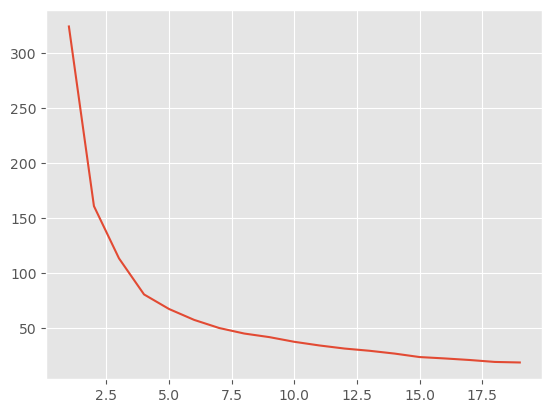

In [20]:
plt.plot(x, y)
plt.show

In [45]:
km = KMeans(n_clusters = 4, init = 'k-means++')
clust_column = km.fit_predict(clust_data)
clust_df['Принадлежность к кластеру'] = clust_column
clust_df

c:\Users\ivvag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ivvag\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Наименование территории,products,clothes,medicines,services,Принадлежность к кластеру,cluster
2,Белгородская область,428.336455,2298.096533,209.220164,2210.984444,0,4
6,Брянская область,506.287636,3157.588267,209.313443,1965.582444,0,4
11,Владимирская область,484.543455,3249.657733,206.069344,2561.731111,3,4
16,Воронежская область,432.540364,2907.391600,209.927705,2315.672444,0,4
20,Ивановская область,461.098000,2761.623733,209.823443,2631.671556,0,4
...,...,...,...,...,...,...,...
357,Амурская область,528.241909,3354.902667,229.657213,3171.568667,3,3
362,Магаданская область,666.236364,3679.341600,246.827541,3816.602889,1,1
366,Сахалинская область,647.269091,4164.779067,240.301475,4001.018222,1,1
371,Еврейская автономная область,547.766000,3480.930933,206.665574,2593.207778,3,3


Объединяем полученные кластеры в отдельные таблицы

In [46]:
cluster_0 = clust_df.loc[clust_df["Принадлежность к кластеру"] == 0]
cluster_1 = clust_df.loc[clust_df["Принадлежность к кластеру"] == 1]
cluster_2 = clust_df.loc[clust_df["Принадлежность к кластеру"] == 2]
cluster_3 = clust_df.loc[clust_df["Принадлежность к кластеру"] == 3]

Состав кластеров:

In [47]:
cluster_0.head(10)

,Наименование территории,products,clothes,medicines,services,Принадлежность к кластеру,cluster
2,Белгородская область,428.336455,2298.096533,209.220164,2210.984444,0,4
6,Брянская область,506.287636,3157.588267,209.313443,1965.582444,0,4
16,Воронежская область,432.540364,2907.391600,209.927705,2315.672444,0,4
20,Ивановская область,461.098000,2761.623733,209.823443,2631.671556,0,4
27,Костромская область,478.974455,3043.445200,207.311311,2021.996000,0,4
30,Курская область,437.134455,2850.168533,202.308689,2059.645333,0,4
34,Липецкая область,405.969182,2717.768133,204.815082,2605.290889,0,4
53,Орловская область,462.669182,2280.833600,203.035082,1966.141556,0,4
57,Рязанская область,461.498364,3005.478533,198.073607,2147.009778,0,4
62,Смоленская область,453.347000,3027.756267,208.107705,2349.685778,0,4


In [48]:
cluster_1.head(10)

,Наименование территории,products,clothes,medicines,services,Принадлежность к кластеру,cluster
82,Город Москва столица Российской Федерации горо...,598.429455,3518.503867,211.265246,4778.819556,1,1
117,Мурманская область,620.814636,4523.038133,222.590820,3400.888000,1,1
130,Город Санкт-Петербург город федерального значения,548.538091,3770.785200,216.136393,4110.701333,1,1
333,Республика Саха (Якутия),621.243545,4499.522667,235.992787,3551.309778,1,1
346,Камчатский край,700.160455,4185.386667,243.988689,3901.697556,1,1
362,Магаданская область,666.236364,3679.341600,246.827541,3816.602889,1,1
366,Сахалинская область,647.269091,4164.779067,240.301475,4001.018222,1,1


In [49]:
cluster_2.head(10)

,Наименование территории,products,clothes,medicines,services,Принадлежность к кластеру,cluster
373,Чукотский автономный округ,839.655636,3451.9732,313.552951,4139.798889,2,2


In [50]:
cluster_3.head(10)

,Наименование территории,products,clothes,medicines,services,Принадлежность к кластеру,cluster
11,Владимирская область,484.543455,3249.657733,206.069344,2561.731111,3,4
23,Калужская область,470.669091,3550.513467,228.170820,2673.748222,3,3
37,Московская область,527.324273,3091.113600,205.996066,3635.536444,3,3
79,Ярославская область,503.380455,3249.804000,212.228197,2652.208444,3,4
84,Республика Карелия,518.805636,3056.372400,223.038689,3162.065778,3,3
88,Республика Коми,500.034273,3975.827600,209.132295,3083.587111,3,3
92,Архангельская область,559.772182,3328.561467,213.197213,3323.363556,3,3
100,Вологодская область,523.729636,3932.800800,209.874590,2547.908444,3,3
104,Калининградская область,526.274273,3572.370533,209.012623,3043.829111,3,3
109,Ленинградская область,514.686818,2810.018667,212.720328,2891.889778,3,3


Иерархическая кластеризация

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

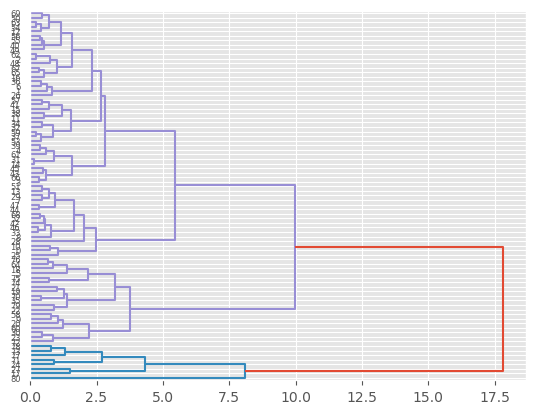

In [52]:
link = linkage(clust_data, 'ward', 'euclidean')
dn = dendrogram(link, orientation = 'right')

In [53]:
clust_df['cluster'] = fcluster(link, 4, criterion = 'maxclust')
clust_df

,Наименование территории,products,clothes,medicines,services,Принадлежность к кластеру,cluster
2,Белгородская область,428.336455,2298.096533,209.220164,2210.984444,0,4
6,Брянская область,506.287636,3157.588267,209.313443,1965.582444,0,4
11,Владимирская область,484.543455,3249.657733,206.069344,2561.731111,3,4
16,Воронежская область,432.540364,2907.391600,209.927705,2315.672444,0,4
20,Ивановская область,461.098000,2761.623733,209.823443,2631.671556,0,4
...,...,...,...,...,...,...,...
357,Амурская область,528.241909,3354.902667,229.657213,3171.568667,3,3
362,Магаданская область,666.236364,3679.341600,246.827541,3816.602889,1,1
366,Сахалинская область,647.269091,4164.779067,240.301475,4001.018222,1,1
371,Еврейская автономная область,547.766000,3480.930933,206.665574,2593.207778,3,3


In [54]:
cluster1 = clust_df.loc[clust_df["cluster"] == 1]
cluster2 = clust_df.loc[clust_df["cluster"] == 2]
cluster3 = clust_df.loc[clust_df["cluster"] == 3]
cluster4 = clust_df.loc[clust_df["cluster"] == 4]

In [59]:
cluster1

,Наименование территории,products,clothes,medicines,services,Принадлежность к кластеру,cluster
82,Город Москва столица Российской Федерации горо...,598.429455,3518.503867,211.265246,4778.819556,1,1
117,Мурманская область,620.814636,4523.038133,222.590820,3400.888000,1,1
130,Город Санкт-Петербург город федерального значения,548.538091,3770.785200,216.136393,4110.701333,1,1
333,Республика Саха (Якутия),621.243545,4499.522667,235.992787,3551.309778,1,1
346,Камчатский край,700.160455,4185.386667,243.988689,3901.697556,1,1
362,Магаданская область,666.236364,3679.341600,246.827541,3816.602889,1,1
366,Сахалинская область,647.269091,4164.779067,240.301475,4001.018222,1,1


In [60]:
cluster2

,Наименование территории,products,clothes,medicines,services,Принадлежность к кластеру,cluster
373,Чукотский автономный округ,839.655636,3451.9732,313.552951,4139.798889,2,2


In [63]:
cluster3

,Наименование территории,products,clothes,medicines,services,Принадлежность к кластеру,cluster
23,Калужская область,470.669091,3550.513467,228.170820,2673.748222,3,3
37,Московская область,527.324273,3091.113600,205.996066,3635.536444,3,3
84,Республика Карелия,518.805636,3056.372400,223.038689,3162.065778,3,3
88,Республика Коми,500.034273,3975.827600,209.132295,3083.587111,3,3
92,Архангельская область,559.772182,3328.561467,213.197213,3323.363556,3,3
100,Вологодская область,523.729636,3932.800800,209.874590,2547.908444,3,3
104,Калининградская область,526.274273,3572.370533,209.012623,3043.829111,3,3
109,Ленинградская область,514.686818,2810.018667,212.720328,2891.889778,3,3
138,Республика Крым,530.079182,2864.686400,207.229836,2976.691111,3,3
166,Республика Дагестан,472.651455,3622.063067,204.771475,2777.081333,3,3


In [64]:
cluster4

,Наименование территории,products,clothes,medicines,services,Принадлежность к кластеру,cluster
2,Белгородская область,428.336455,2298.096533,209.220164,2210.984444,0,4
6,Брянская область,506.287636,3157.588267,209.313443,1965.582444,0,4
11,Владимирская область,484.543455,3249.657733,206.069344,2561.731111,3,4
16,Воронежская область,432.540364,2907.391600,209.927705,2315.672444,0,4
20,Ивановская область,461.098000,2761.623733,209.823443,2631.671556,0,4
27,Костромская область,478.974455,3043.445200,207.311311,2021.996000,0,4
30,Курская область,437.134455,2850.168533,202.308689,2059.645333,0,4
34,Липецкая область,405.969182,2717.768133,204.815082,2605.290889,0,4
53,Орловская область,462.669182,2280.833600,203.035082,1966.141556,0,4
57,Рязанская область,461.498364,3005.478533,198.073607,2147.009778,0,4
